# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

In [1]:
import praw
import pandas as pd

import credentials

In [2]:
# collect data from a subreddit of your choice

#     at a minimum, collect the posts from the subreddit; optionally collect comments on the posts

reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

In [3]:
jris_posts = reddit.subreddit('justrolledintotheshop').hot(limit=None)

In [4]:
jris_posts = list(jris_posts)

In [5]:
# from praw.models import MoreComments

# for post in jris_posts:
#     post.comments.replace_more(limit=1)

In [6]:
jris_posts[3].

SyntaxError: invalid syntax (<ipython-input-6-c6f99281966b>, line 1)

In [7]:
temp = jris_posts.copy()

# save the data to a SQLite3 database
jris_posts_dict = {
    'id' : [],
    'title' : [],
    'link' : [],
    'flair' : [],
    'author' : [],
    'n_comments' : [],
    'score' : [],
    'text' : []
}


for post in temp:
    jris_posts_dict['id'].append(post.id)
    jris_posts_dict['title'].append(post.title)
    jris_posts_dict['link'].append(post.permalink)
    jris_posts_dict['flair'].append(post.link_flair_text)
    if post.author is None:
        jris_posts_dict['author'].append('')
    else:
        jris_posts_dict['author'].append(post.author.name)
    
    if post.num_comments is None:
        jris_posts_dict['n_comments'].append(0)
    else:
        jris_posts_dict['n_comments'].append(post.num_comments)
        
    jris_posts_dict['score'].append(post.score)
    jris_posts_dict['text'].append(post.selftext)

In [8]:
jris_posts_df = pd.DataFrame(jris_posts_dict)

In [23]:
import sqlite3

con = sqlite3.connect('./data/jris_dataset.sqlite')
jris_posts_df.to_sql('posts', con, if_exists='replace', index=False)

In [9]:
jris_posts_df.head()

,id,title,link,flair,author,n_comments,score,text
0,6kuoc5,Original Content ONLY,/r/Justrolledintotheshop/comments/6kuoc5/origi...,None,tractorferret,2,7088,There seems to be a recent influx of posts fro...
1,iw8g4a,1 mil subs+need to clear some things up,/r/Justrolledintotheshop/comments/iw8g4a/1_mil...,None,tractorferret,0,1049,"First of all, congratulations on 1 million sub..."
2,p4sv13,“Pure Michigan”,/r/Justrolledintotheshop/comments/p4sv13/pure_...,None,trashlordcommander,370,3196,
3,p4jyyv,Gross. 2004 Lincoln Navigator I swapped an alt...,/r/Justrolledintotheshop/comments/p4jyyv/gross...,None,immrfixit92,234,1743,
4,p4jy4u,1/4” bolts in 1/2” holes? It only holds on the...,/r/Justrolledintotheshop/comments/p4jy4u/14_bo...,None,puerh_lover,84,995,


In [20]:
jris_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          958 non-null    object
 1   title       958 non-null    object
 2   link        958 non-null    object
 3   flair       0 non-null      object
 4   author      958 non-null    object
 5   n_comments  958 non-null    int64 
 6   score       958 non-null    int64 
 7   text        958 non-null    object
dtypes: int64(2), object(6)
memory usage: 60.0+ KB


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/basket/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
fd = nltk.FreqDist(' '.join(jris_posts_df['title']).split())

fd.most_common(20)

[('the', 406),
 ('a', 340),
 ('to', 227),
 ('in', 176),
 ('and', 174),
 ('I', 161),
 ('for', 130),
 ('of', 127),
 ('this', 120),
 ('it', 117),
 ('on', 107),
 ('is', 88),
 ('my', 80),
 ('with', 67),
 ('you', 60),
 ('just', 59),
 ('was', 56),
 ('out', 54),
 ('C/S', 54),
 ('Customer', 53)]

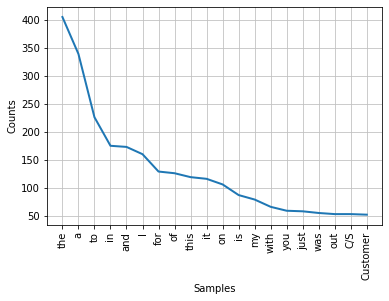

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
fd.plot(20)

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/basket/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
words = ' '.join(jris_posts_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [15]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(20)

[('customer', 73),
 ('c/s', 58),
 ('new', 55),
 ('shop', 54),
 ('rolled', 51),
 ('car', 44),
 ('got', 41),
 ('like', 38),
 ('one', 36),
 ('oil', 34),
 ('came', 29),
 ('work', 29),
 ('get', 28),
 ('engine', 24),
 ('back', 23),
 ('air', 22),
 ('still', 22),
 ('found', 21),
 ('states', 21),
 ('check', 20)]

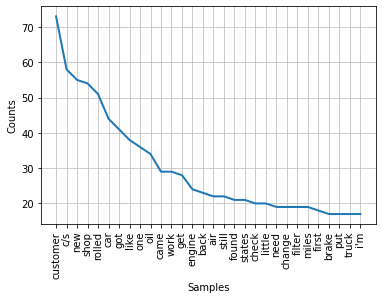

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
cleaned_fd.plot(30)

array([[<AxesSubplot:xlabel='n_comments', ylabel='n_comments'>,
        <AxesSubplot:xlabel='score', ylabel='n_comments'>],
       [<AxesSubplot:xlabel='n_comments', ylabel='score'>,
        <AxesSubplot:xlabel='score', ylabel='score'>]], dtype=object)

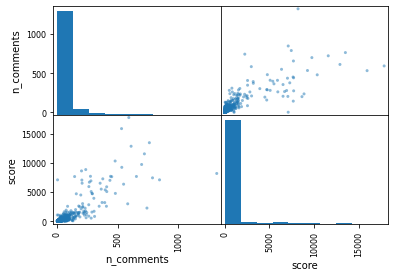

In [17]:
# perform some basic EDA on the data

#     create at least 2 plots

pd.plotting.scatter_matrix(jris_posts_df)

<AxesSubplot:>

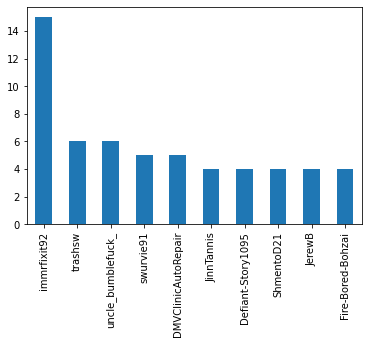

In [18]:
jris_posts_df['author'].value_counts()[:10].plot.bar()

In [21]:
jris_posts_df['title'].loc[jris_posts_df['author']=='immrfixit92']

3      Gross. 2004 Lincoln Navigator I swapped an alt...
132    My daddy's a mechanic!.... k Yes that crap was...
152    2015 Ford F350 brake job. Looks like this truc...
214    2011 Avalanche came in for a tire. Had only 3 ...
251    How to professionally undercoat your prized tr...
263    2018 Ram 1500 in for alignment.... C/S Check t...
592    Every now and then I award the "Dumbest Design...
685    They drove 11hrs. Needed tires, and I find thi...
727    Another poster reminded me of this gem from a ...
757    2012 Malibu. C/S I hit a curb. I need an align...
766    C/S I need an alignment. My tire is wearing ba...
771    Some days I love my job. I got to work on this...
787    Enough people asked for the Camaro running. So...
894    People drive this crap. Sometimes I wish state...
904                        Let's play spot the problems!
Name: title, dtype: object

# Analysis

I was honestly surprised how easy it was to parse the reddit data; the nltk package made it so
easy to make sense of the titles by removing all the "stopwords". I have never heard that term
before so it would've been hard to come across on my own. I saved my data to a sqlite database
but still did my manipulations in pandas, I'm pretty comfortable with SQL but I feel like if
you've already got the data in the dataframe...

The subreddit I chose is JustRolledIntoTheShop, which is basically just crazy cars in awful
condition of some kind coming into the mechanic. A joke subreddit. It is funny to see all the
words you'd expect like brake, oil, engine, etc. Customer and C/S (customer says) are on the 
very top, which is funny because people are cracking jokes on what the customer said when
dropping the car off.

I was honestly hoping to see some mention of a certain car make or model. Thought that might be funny to see it show up more often than others but unfortunately the most common terms are just more general car parts, although that does make sense.